
# Here’s a step-by-step procedure to create a lab experiment using Principal Component Analysis (PCA) on the Iris dataset.

Objective:
The objective of this lab is to understand how PCA can reduce the dimensionality of data while preserving as much variance as possible and to visualize the data in a lower-dimensional space.

In [16]:
# Step 1: Load the Dataset


# Import necessary libraries
import pandas as pd

# Load the dataset
df = pd.read_csv("iris.csv")

# Display the first few rows of the dataset
print(df.head())


   ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0   1           5.1          3.5           1.4          0.2  setosa
1   2           4.9          3.0           1.4          0.2  setosa
2   3           4.7          3.2           1.3          0.2  setosa
3   4           4.6          3.1           1.5          0.2  setosa
4   5           5.0          3.6           1.4          0.2  setosa


In [17]:
# Step 2: Prepare the Data

# Separate features and target variable
X = df.drop(columns=['Species'])  # Assuming 'species' is the target column
y = df['Species']

# Display the features
print(X.head())


   ID  Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
0   1           5.1          3.5           1.4          0.2
1   2           4.9          3.0           1.4          0.2
2   3           4.7          3.2           1.3          0.2
3   4           4.6          3.1           1.5          0.2
4   5           5.0          3.6           1.4          0.2


In [18]:
# Step 3: Standardize the Data
# The StandardScaler scales the data so that each feature has a mean of 0 and a standard deviation of 1.
# Standardizing the data using StandardScaler (i.e., scaling the data so that each feature 
#has a mean of 0 and a standard deviation of 1) 
#is important in many machine learning algorithms and techniques like PCA for the following reasons:

from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Display standardized data
print(X_scaled[:5])



[[-1.72054204 -0.90068117  1.01900435 -1.34022653 -1.3154443 ]
 [-1.69744751 -1.14301691 -0.13197948 -1.34022653 -1.3154443 ]
 [-1.67435299 -1.38535265  0.32841405 -1.39706395 -1.3154443 ]
 [-1.65125846 -1.50652052  0.09821729 -1.2833891  -1.3154443 ]
 [-1.62816394 -1.02184904  1.24920112 -1.34022653 -1.3154443 ]]


In [19]:
# Step 4: Apply PCA


from sklearn.decomposition import PCA

# Apply PCA to reduce to 2 principal components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Display the first 5 rows of the transformed data
print(X_pca[:5])


[[-2.81575679  0.48057012]
 [-2.64097465 -0.6709484 ]
 [-2.87625657 -0.3437183 ]
 [-2.8069616  -0.59875587]
 [-2.88003728  0.64360721]]


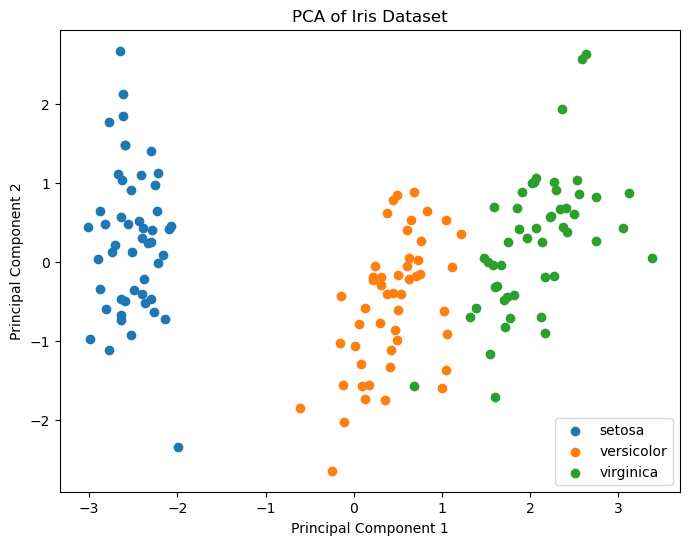

In [20]:
# Step 5: Visualize the Result


import matplotlib.pyplot as plt

# Create a DataFrame with PCA results and species
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

# Plot the PCA result
plt.figure(figsize=(8, 6))
for species in pca_df['species'].unique():
    subset = pca_df[pca_df['species'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], label=species)

plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [21]:
# Step 6: Evaluate Explained Variance

# Explained variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by each component: {explained_variance}")



Explained variance by each component: [0.74845859 0.18287672]


In [22]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")


Explained variance by PC1: 0.75
Explained variance by PC2: 0.18


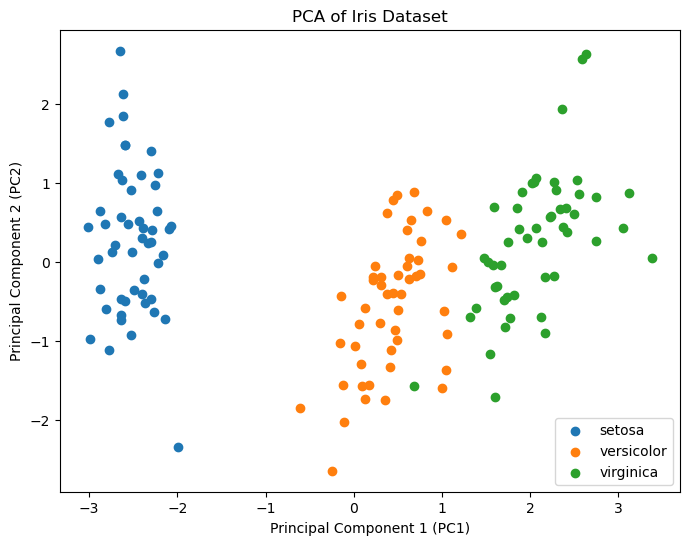

Explained variance by PC1: 0.75
Explained variance by PC2: 0.18


In [23]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'X_pca' contains the PCA-transformed data (2 components)
# and 'y' contains the species labels

# Create a DataFrame with PCA results and species labels
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['species'] = y

# Plot the PCA result
plt.figure(figsize=(8, 6))  # Set the figure size

# Loop through each unique species and plot their respective points
for species in pca_df['species'].unique():
    subset = pca_df[pca_df['species'] == species]
    plt.scatter(subset['PC1'], subset['PC2'], label=species)

# Set title and axis labels
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend()  # Add legend to distinguish species
plt.show()

# Calculate and print explained variance ratio for PC1 and PC2
explained_variance = pca.explained_variance_ratio_
print(f"Explained variance by PC1: {explained_variance[0]:.2f}")
print(f"Explained variance by PC2: {explained_variance[1]:.2f}")
